# **Kaggle Titanic Dataset**


The primary objective of this notebook is to gather and analyze insights into the survival rates in the Titanic shipwreck. An overview section is provided below, detailing the procedures undertaken to execute the project.

Great inspiration gained from Ken Jee

Best result: 79.987 (Top 10%)

### Overview

1. Understand the data 

2. Data Cleaning

3. Data Exploration

4. Feature Engineering

5. Data Preprocessing

6. Model building

7. Parameter tuning

8. Ensemble

9. Results

In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [85]:
warnings.filterwarnings('ignore')

Add the dataset and evaluate the columns

In [86]:
training = pd.read_csv('G:/Data Science/Dataset/Titanic data/train.csv')
test = pd.read_csv('G:/Data Science/Dataset/Titanic data/test.csv')

column_names = list(training.keys())
column_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']


### Project Planning

Step down the procedure

* Understand nature of the data .info() .describe()
* Histograms and boxplots
* Value counts
* Missing data
* Correlation between the metrics
* Explore themes
* Feature engineering

### Light Data Exploration


1. Numeric Data

     * Histograms to understand the distribution
     * Box and whicker plot to group numerical data quartiles 
     * Corrplot
     * Pivot table to comparing survival rate across numeric variables


2. Categoorical Data

    * Bar charts to undersatnd the balance of clases
    * Pivot table to get relationship with survival


In [87]:
# Explore the data and null values
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
# Explore the null values
training.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [89]:
# This gives a statical summary of the data
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
# Divide data into categorical and numerical values 
df_numeric   = training[['Age','Fare']]
df_categoric = training[['Survived','SibSp','Parch','Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]


print(df_numeric.columns)
print(df_categoric.columns)

Index(['Age', 'Fare'], dtype='object')
Index(['Survived', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Ticket', 'Cabin',
       'Embarked'],
      dtype='object')


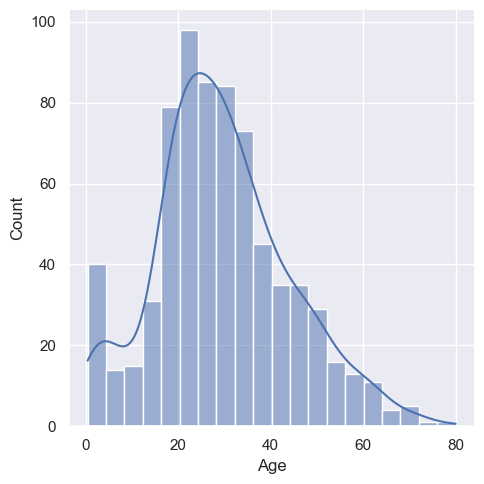

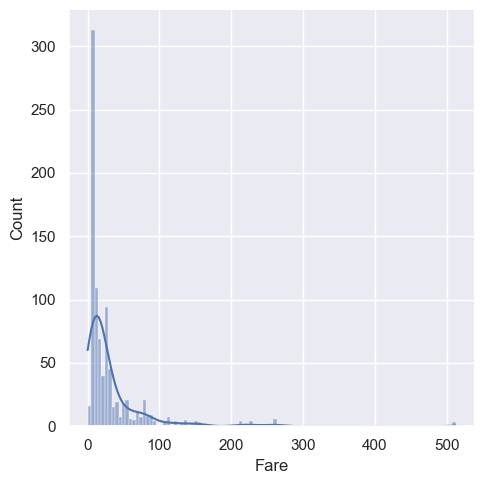

In [91]:
# Generate histograms for all numeric data
for i in df_numeric.columns:
    sns.displot(df_numeric[i], kde=True)

<Axes: >

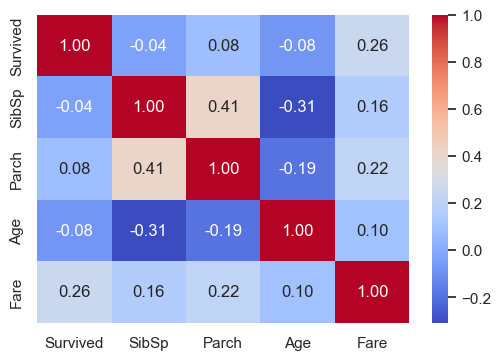

In [92]:
# Evaluate the corrrelation in numerical data
sns.heatmap(training[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

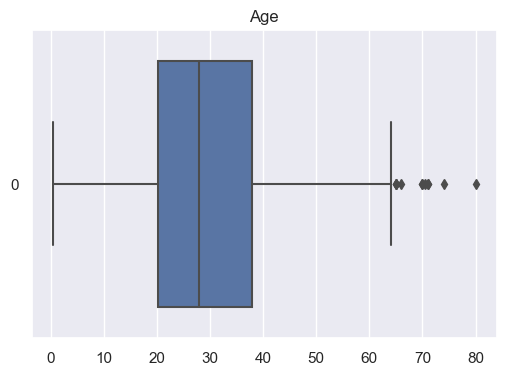

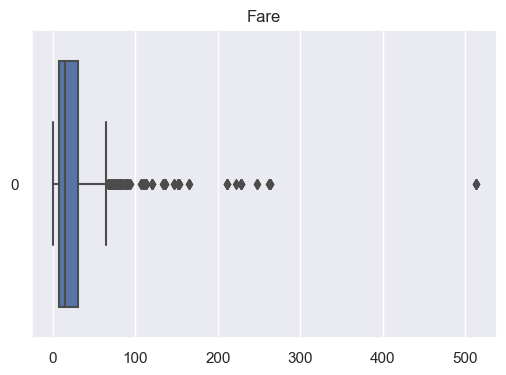

In [93]:
# Evaluate numeric data quatiles in numeric variables in single column

sns.boxplot(training["Age"], orient = 'h')
plt.title("Age")
plt.show()

sns.boxplot(training["Fare"], orient = 'h')
plt.title("Fare")
plt.show()


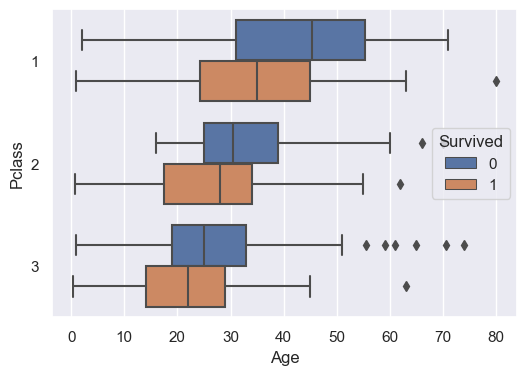

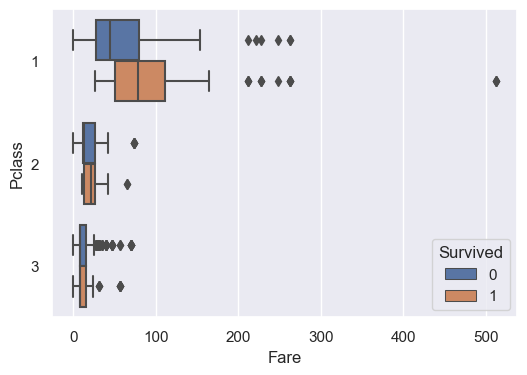

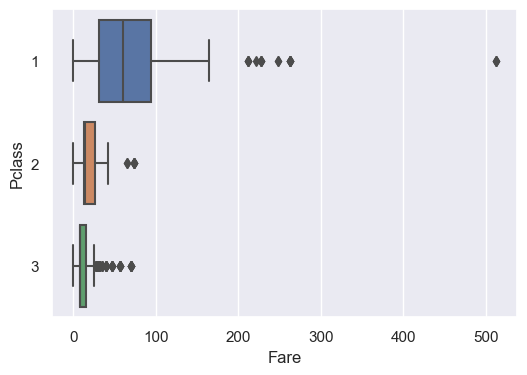

In [94]:
# Evaluate data quatiles with nested grouping

sns.boxplot(x = training["Age"], y = training['Pclass'], hue = training['Survived'], orient = 'h')
plt.show()
sns.boxplot(x = training["Fare"], y = training['Pclass'], hue = training['Survived'], orient = 'h')
plt.show()
sns.boxplot(x = training["Fare"], y = training['Pclass'], orient = 'h')
plt.show()

In [95]:
# Compare survival rate in numeric variables
pd.pivot_table(training, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


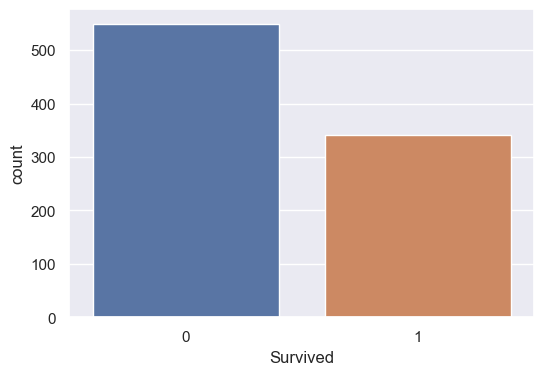

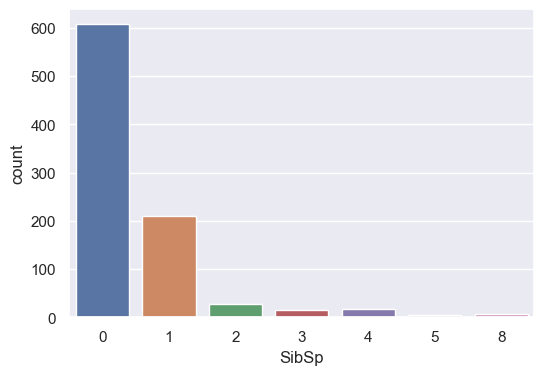

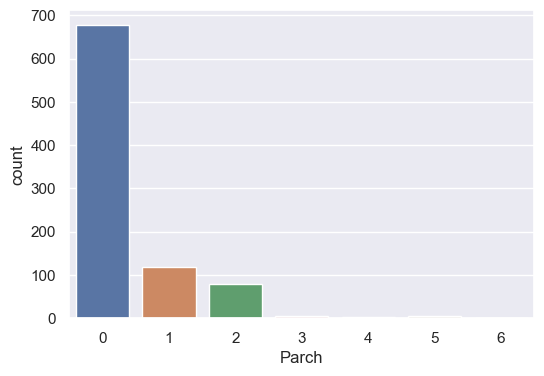

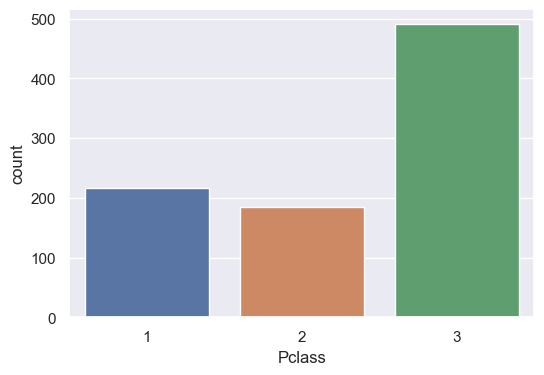

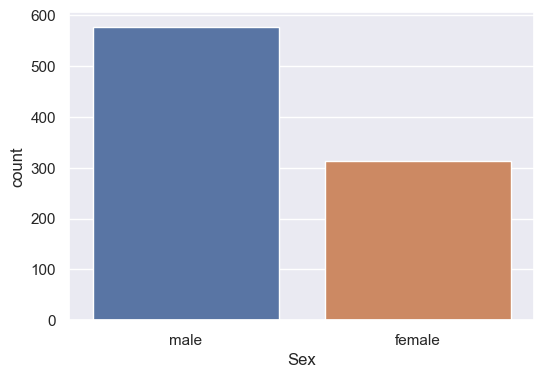

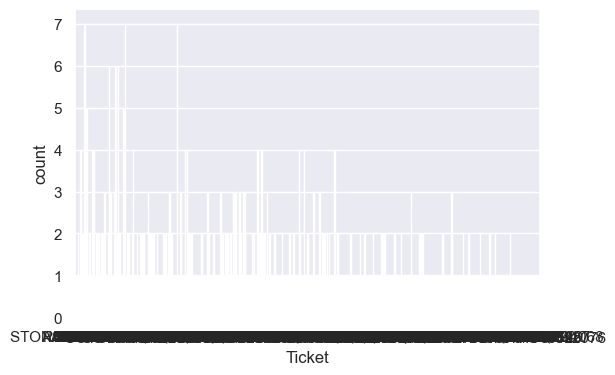

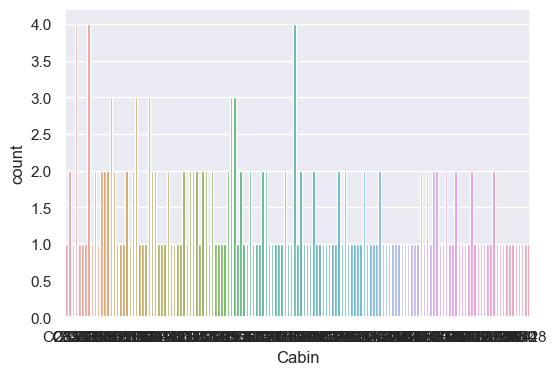

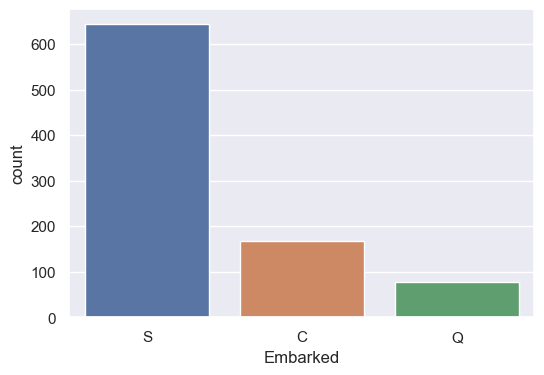

In [96]:
# Generate the histogram for categorical data
width = 6
height = 4
sns.set(rc = {'figure.figsize':(width, height)})
for i in df_categoric.columns:
    sns.countplot(data=training, x=df_categoric[i])
    plt.show()

In [97]:
# Compare survival rate in categorical variables
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='SibSp', values='Ticket', aggfunc='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN



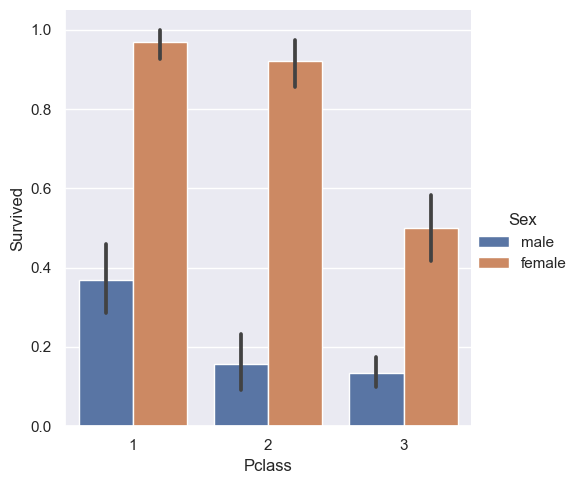

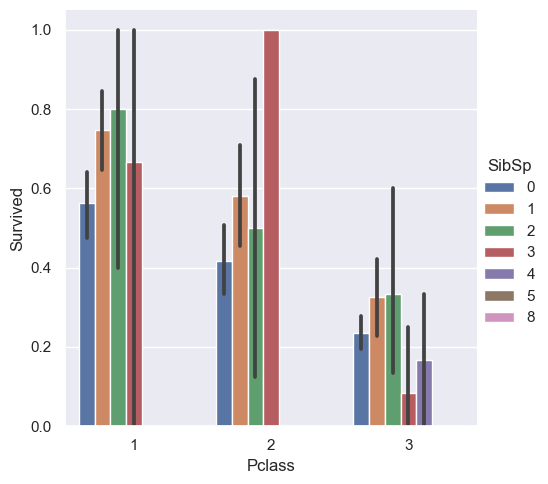

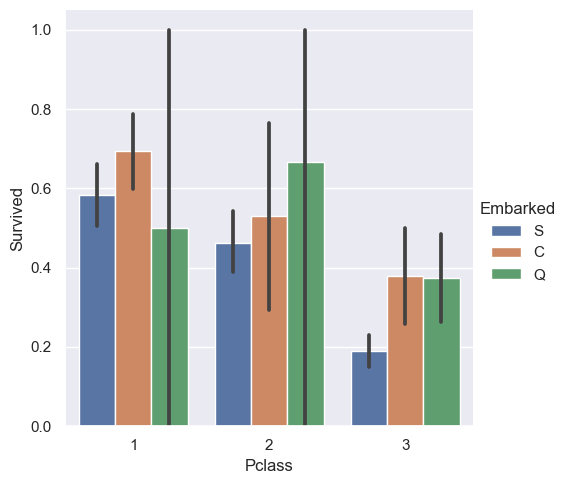

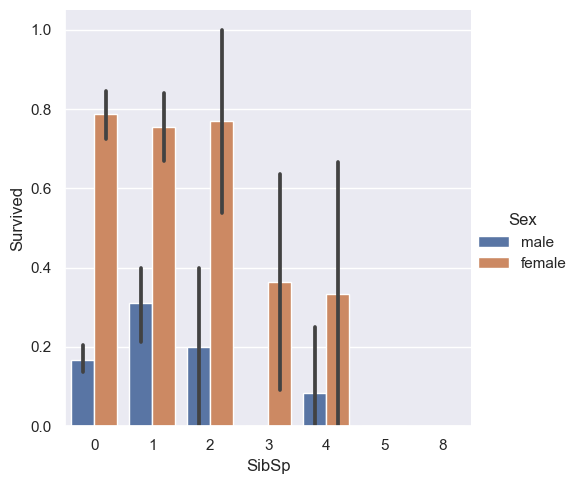

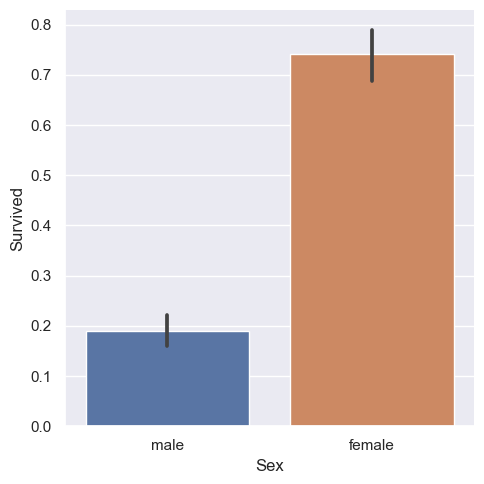

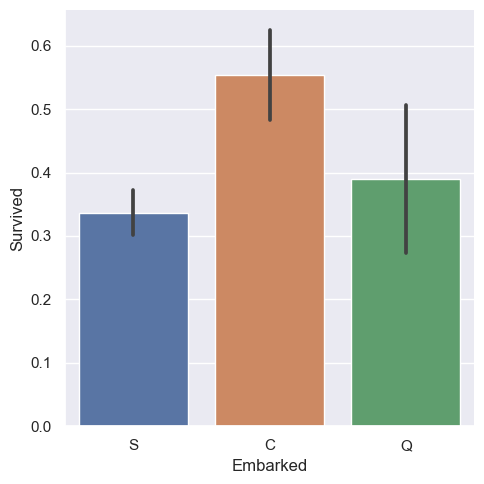

In [98]:
# Group the features with survival rate
sns.catplot(data=training, x="Pclass", y="Survived", hue="Sex", kind="bar")
sns.catplot(data=training, x="Pclass", y="Survived", hue="SibSp", kind="bar")
sns.catplot(data=training, x="Pclass", y="Survived", hue="Embarked", kind="bar")
sns.catplot(data=training, x="SibSp", y="Survived", hue="Sex", kind="bar")
sns.catplot(data=training, x="Sex", y="Survived", kind="bar")
sns.catplot(data=training, x="Embarked", y="Survived",kind="bar")

### Feature Engineering

* Cabin column
* Person's tittle

#### Cabin column

In [99]:
# Evaluate people had multiple cabins
training['Cabin_multiply'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [100]:
training['Cabin_multiply'].value_counts()

Cabin_multiply
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [101]:
# Evaluate the survival based on multiple cabin
pd.pivot_table(training, index='Survived', columns='Cabin_multiply', values='Ticket', aggfunc='count')

Cabin_multiply,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


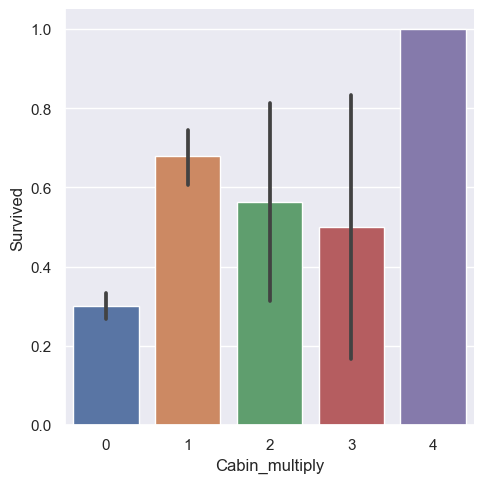

In [102]:
# Evaluate the survival rate based on multiple cabins
sns.catplot(data=training, x="Cabin_multiply", y="Survived", kind="bar")

In [103]:
# Capture the fist letter on cabins
training['Cabin_letter'] = training.Cabin.apply(lambda x: str(x)[0])

In [104]:
training.Cabin_letter.value_counts()

Cabin_letter
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [105]:
pd. pivot_table(training, index="Survived", columns="Cabin_letter", values='Name', aggfunc='count')

Cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


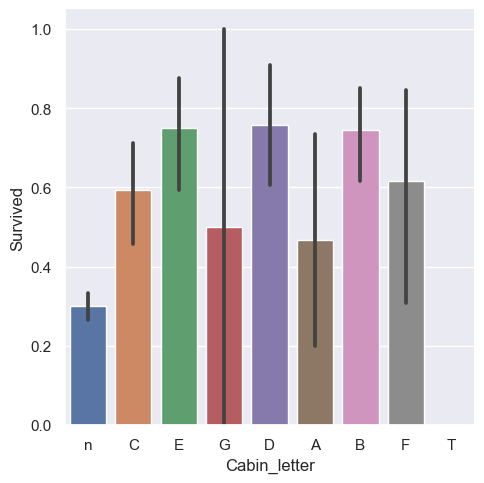

In [106]:
sns.catplot(data=training, x="Cabin_letter", y="Survived", kind="bar")

#### People's title

In [107]:
# Capture people's title
training['Name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [108]:
training.Name_title.value_counts()

Name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [109]:
pd.pivot_table(training, index="Survived", columns="Name_title", values="Name", aggfunc='count')

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


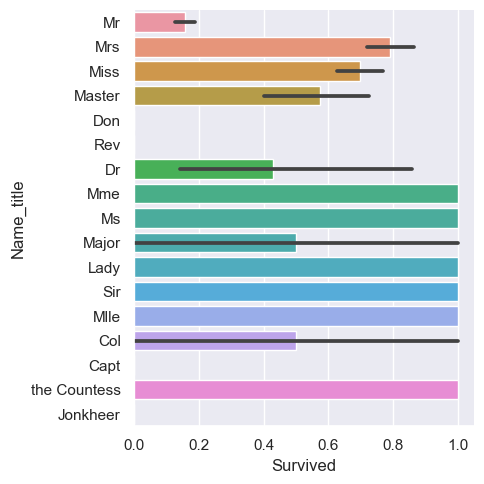

In [110]:
# Evaluate the name title with survival rate
sns.catplot(data=training, x="Survived", y="Name_title", kind="bar",orient="h")

#### Data Preprocessing

* Drop null values
* Remove outliers
* Include relevent variables
* Do categorical transformation on all data
* Impute data with median
* Normalized fare using logarithm to give more sembalance of normal distribution
* Scaled data  0-1 with standard scaler

#### Training dataset preprocess

In [111]:
# Capture the null values in training dataset
training.isnull().sum().sort_values(ascending = False)

Cabin             687
Age               177
Embarked            2
PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin_multiply      0
Cabin_letter        0
Name_title          0
dtype: int64

In [112]:
# Impute null values
Filled_null_training = training.fillna({
    'Age':training.Age.median(),
    'Fare':training.Fare.median(),
},inplace=True)

In [113]:
# Drop null embarked rows
training.dropna(subset=['Embarked'], inplace = True)

In [114]:
# Detect outliers
def detect_outliers(df, features):

    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    return outlier_indices

outliers_to_drop = detect_outliers(training, ['Age','Fare','SibSp','Parch'])

In [115]:
outlier_series = pd.Series(outliers_to_drop)
outlier_series_exclude = outlier_series.value_counts().loc[lambda x: x > 2]
outlier_series_exclude.index

Index([  7, 642, 305, 386, 438, 863, 159, 846, 792, 587, 659, 268, 745, 824,
       879, 341,  27, 324,  88, 201, 297, 180, 119,  16, 164],
      dtype='int64')

In [116]:
training.loc[outlier_series_exclude.index].sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_multiply,Cabin_letter,Name_title
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,C,Mrs
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,n,Mr
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C,1,D,Mr
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,2,C,Miss
324,325,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,n,Mr
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0,n,Master
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,1,C,Mrs
180,181,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.5500,NaN,S,0,n,Miss
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,0,n,Miss
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S,0,n,Miss


In [117]:
training = training.drop(outlier_series_exclude.index, axis = 0).reset_index(drop = True)

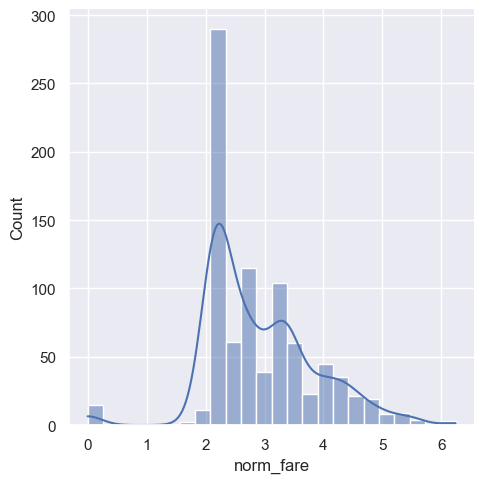

In [118]:
# Log norm of fare
training['norm_fare'] = np.log(training.Fare+1)
sns.displot(training.norm_fare, kde="bar")

In [119]:
training['norm_fare'] = training.norm_fare.apply(lambda x: np.round(x, decimals = 3))

<Axes: xlabel='norm_fare', ylabel='Count'>

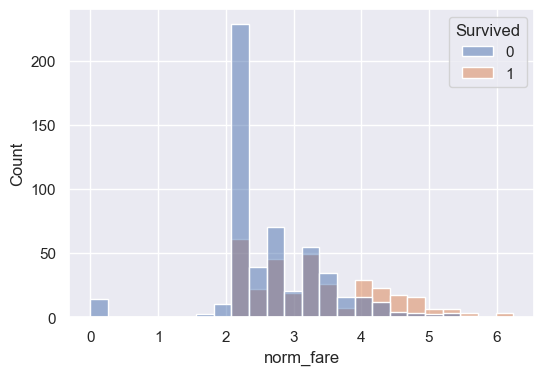

In [120]:
sns.histplot(training, x="norm_fare", hue = "Survived")

In [121]:
training.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_multiply,Cabin_letter,Name_title,norm_fare
535,553,0,3,"O'Brien, Mr. Timothy",male,28.0,0,0,330979,7.8292,NaN,Q,0,n,Mr,2.178
854,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,0,n,Mr,2.186
544,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S,0,n,Mr,2.186
770,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,0,n,Mr,3.296


In [122]:
# Drop features based on correlation score
training.drop(['Name','Ticket','Fare', 'Cabin', 'Cabin_letter'], axis = 1, inplace= True)

In [123]:
# Construct the final training datasset
training.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_multiply,Name_title,norm_fare
263,275,1,3,female,28.0,0,0,Q,0,Miss,2.169
599,618,0,3,female,26.0,1,0,S,0,Mrs,2.839
555,573,1,1,male,36.0,0,0,S,1,Mr,3.310
515,533,0,3,male,17.0,1,1,C,0,Mr,2.108
830,856,1,3,female,18.0,0,1,S,0,Mrs,2.337
558,576,0,3,male,19.0,0,0,S,0,Mr,2.741
677,698,1,3,female,28.0,0,0,Q,0,Miss,2.167
248,259,1,1,female,35.0,0,0,C,0,Miss,6.241
192,203,0,3,male,34.0,0,0,S,0,Mr,2.014
640,661,1,1,male,50.0,2,0,S,0,Dr,4.903


#### Testing dataset preprocess

In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [125]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [126]:
Filled_null_test = test.fillna({
    'Age':training.Age.median(),
},inplace=True)

In [127]:
# Evaluate people had multiple cabins in test data
test['Cabin_multiply'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [128]:
# Evaluate people's title in test data
test['Name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

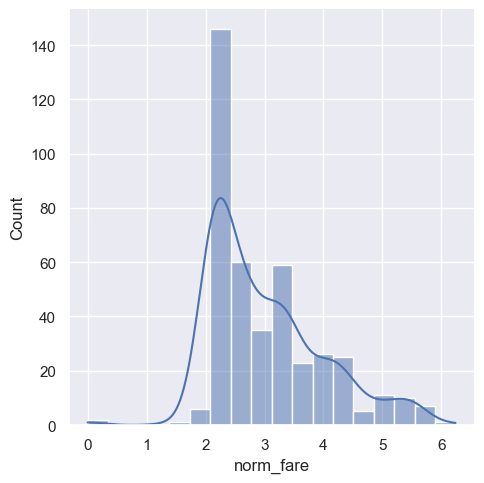

In [129]:
# Log norm of fare in test data
test['norm_fare'] = np.log(test.Fare+1)
sns.displot(test.norm_fare, kde="bar")

In [130]:
test['norm_fare'] = test.norm_fare.apply(lambda x: np.round(x, decimals = 3))

In [131]:
test.drop(['Name','Ticket','Fare', 'Cabin'], axis = 1, inplace= True)

In [132]:
test.fillna({'norm_fare': training.norm_fare.median()}, inplace = True)

In [133]:
# Construct the final testing dataset
test.sample(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_multiply,Name_title,norm_fare
180,1072,2,male,30.0,0,0,S,0,Mr,2.639
116,1008,3,male,28.0,0,0,C,0,Mr,2.007
265,1157,3,male,28.0,0,0,S,0,Mr,2.186
158,1050,1,male,42.0,0,0,S,1,Mr,3.316
298,1190,1,male,30.0,0,0,S,0,Mr,3.839
141,1033,1,female,33.0,0,0,S,0,Miss,5.027
190,1082,2,male,34.0,1,0,S,0,Mr,3.296
211,1103,3,male,28.0,0,0,S,0,Mr,2.086
96,988,1,female,76.0,1,0,S,1,Mrs,4.380
115,1007,3,male,18.0,1,0,C,0,Mr,2.738


#### Combine Training and Testing dataset

In [134]:
all_data = pd.concat([training, test])

In [135]:
all_data.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Embarked            0
Cabin_multiply      0
Name_title          0
norm_fare           0
dtype: int64

In [136]:
# Create dummies
all_data = pd.get_dummies(all_data, columns = ['Sex', 'Embarked', 'Name_title'])

In [137]:
train = all_data[:len(training)]
test = all_data[len(training):]

In [138]:
train.shape, test.shape

((864, 30), (418, 30))

In [139]:
train['Survived'] = train['Survived'].astype('int')

In [140]:
test = test.drop('Survived', axis=1)

In [141]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.copy()
print("X_train shape is ", X_train.shape)
print("Y_train shape is ", Y_train.shape)
print("X_test shape is ", X_test.shape)

X_train shape is  (864, 29)
Y_train shape is  (864,)
X_test shape is  (418, 29)


In [142]:
# Capture best parameters for the models
random_forest = RandomForestClassifier()
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [16, 20, 22, 24, 30, 34],
}

# Perform grid search
grid_search = GridSearchCV(random_forest, param_grid, cv = 3, n_jobs = 7 )
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 30, 'n_estimators': 200}
Best Score: 0.8298611111111112


In [143]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_features = 'sqrt',
                                        max_leaf_nodes = 34)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [144]:
cross_val_score(random_forest, X_train, Y_train, cv = 10).mean()

0.8263565891472868

In [145]:
submission = pd.DataFrame({
    'PassengerID': test['PassengerId'],
    'Survived': Y_pred
})

In [146]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerID  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 8.2 KB


In [147]:
submission.to_csv("submission.csv", index = False)